In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)
df

,avg_recall,search_duration,total_duration,search_function,k,n_queries
0,0.0600,1838,0,cpu,100,1
1,0.0600,9363,10054,gpu_non_opt,100,1
2,0.0600,6399,6790,gpu_shared_mem,100,1
3,0.0600,3168,3546,gpu_eucdist_opt,100,1
4,0.0600,3553,3990,gpu_bloom_pq,100,1
...,...,...,...,...,...,...
595,0.0007,7727,8350,gpu_non_opt,100,100
596,0.0016,5558,6041,gpu_shared_mem,100,100
597,0.0007,5131,5595,gpu_eucdist_opt,100,100
598,0.0375,7631,8112,gpu_bloom_pq,100,100


In [57]:
df[df['search_function'] == "cpu"][df["n_queries"] == 100].sort_values(by="k")

/tmp/ipykernel_191330/3462662236.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['search_function'] == "cpu"][df["n_queries"] == 100].sort_values(by="k")


,avg_recall,search_duration,total_duration,search_function,k,n_queries
594,0.0374,217974,0,cpu,100,100


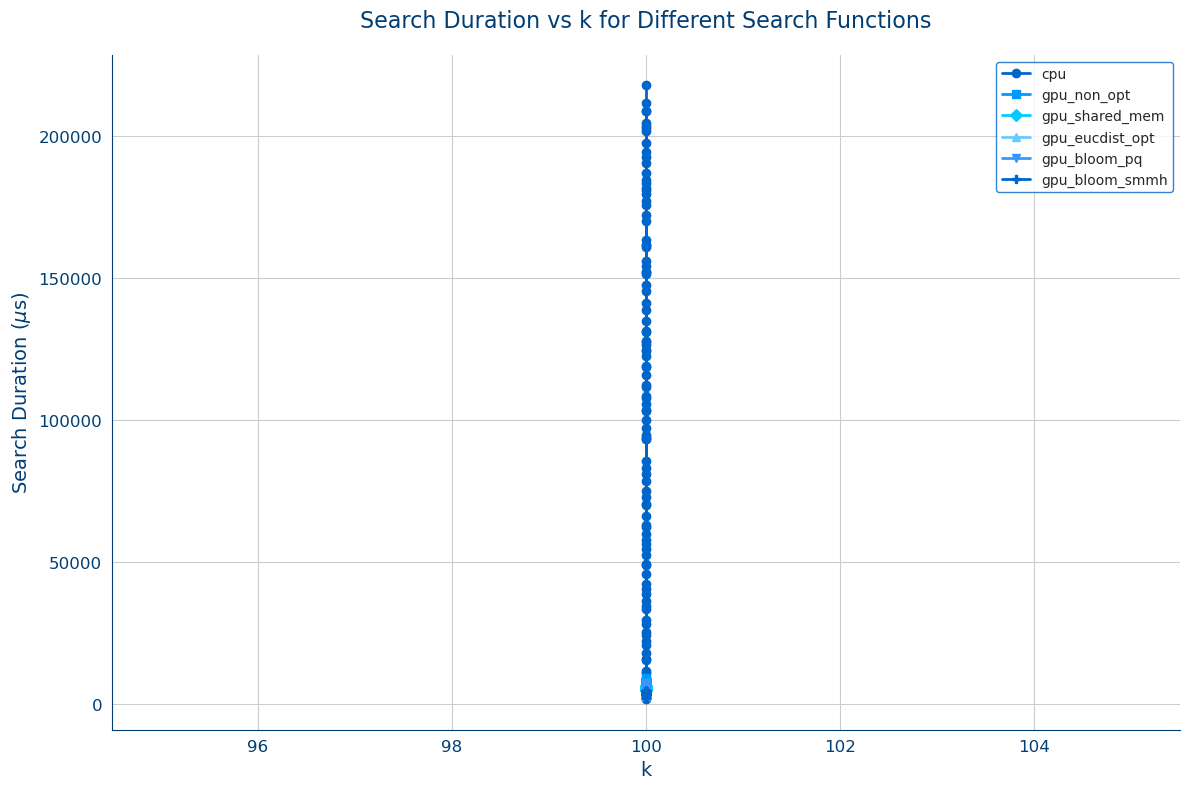

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)

# Define Politecnico di Milano color palette
polimi_colors = {
    'background': '#FFFFFF',      # White
    'text': '#003E74',            # Dark Blue
    'accent1': '#0066CC',         # Medium Blue
    'accent2': '#0099FF',         # Light Blue
    'accent3': '#00CCFF',         # Cyan
    'accent4': '#66CCFF',         # Sky Blue
    'accent5': '#3399FF'          # Royal Blue
}

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a color palette based on Polimi colors
palette = [polimi_colors['accent1'], polimi_colors['accent2'], polimi_colors['accent3'],
           polimi_colors['accent4'], polimi_colors['accent5']]

# Plot each search function with distinct colors and markers
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Add more markers if needed
for i, search_function in enumerate(df["search_function"].unique()):
    df_sf = df[df['search_function'] == search_function].sort_values(by="k")
    plt.plot(
        df_sf["k"], 
        df_sf["search_duration"], 
        label=search_function,
        color=palette[i % len(palette)],
        marker=markers[i % len(markers)],
        linewidth=2,
        markersize=6
    )

# Customize axes labels and title with LaTeX for microseconds
plt.xlabel("k", fontsize=14, color=polimi_colors['text'])
plt.ylabel(r"Search Duration ($\mu$s)", fontsize=14, color=polimi_colors['text'])
plt.title("Search Duration vs k for Different Search Functions", fontsize=16, color=polimi_colors['text'], pad=20)

# Customize tick parameters
plt.xticks(fontsize=12, color=polimi_colors['text'])
plt.yticks(fontsize=12, color=polimi_colors['text'])

# Customize legend
plt.legend(title='Search Function', fontsize=12, title_fontsize=14, loc='best')
plt.legend().get_frame().set_edgecolor(polimi_colors['accent1'])

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(polimi_colors['text'])
ax.spines['bottom'].set_color(polimi_colors['text'])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with high resolution
plt.savefig("figures/search_duration_plot_including_cpu_smoothed_k.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


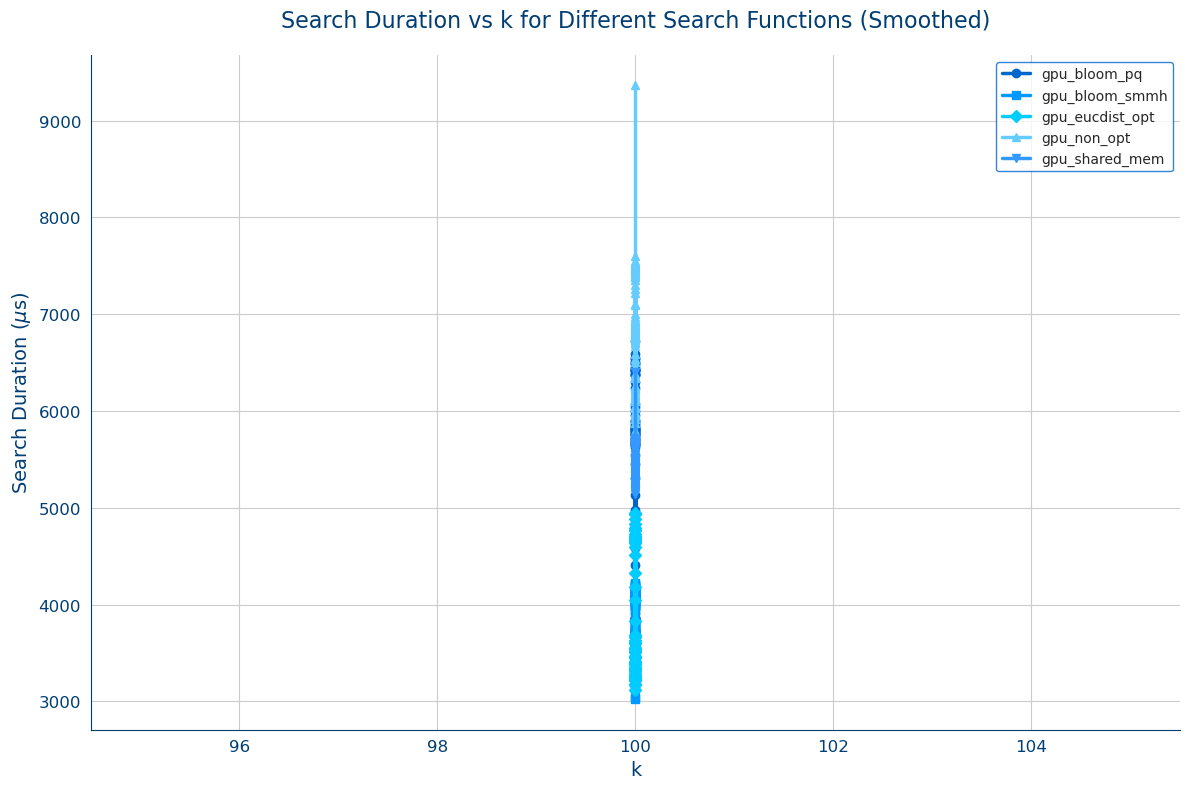

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)

# Exclude the "cpu" search function
df = df[df["search_function"].str.lower() != "cpu"]
#df = df[df["search_function"].str.lower() != "gpu_bloom_pq"]

# Define the window size for smoothing
window_size = 10  # Adjust based on your data's noise level

# Apply rolling mean per search_function
df_sorted = df.sort_values(by=["search_function", "k"])  # Ensure data is sorted for rolling
df_sorted['search_duration_smooth'] = df_sorted.groupby('search_function')['search_duration'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Define Politecnico di Milano color palette
polimi_colors = {
    'background': '#FFFFFF',      # White
    'text': '#003E74',            # Dark Blue
    'accent1': '#0066CC',         # Medium Blue
    'accent2': '#0099FF',         # Light Blue
    'accent3': '#00CCFF',         # Cyan
    'accent4': '#66CCFF',         # Sky Blue
    'accent5': '#3399FF'          # Royal Blue
}

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a color palette based on Polimi colors
palette = [polimi_colors['accent1'], polimi_colors['accent2'], polimi_colors['accent3'],
           polimi_colors['accent4'], polimi_colors['accent5']]

# Define markers for different search functions
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Add more markers if needed

# Plot each search function with distinct colors and markers
for i, search_function in enumerate(df_sorted["search_function"].unique()):
    df_sf = df_sorted[df_sorted['search_function'] == search_function].sort_values(by="k")
    plt.plot(
        df_sf["k"], 
        df_sf["search_duration_smooth"],  # Use the smoothed data
        label=search_function,
        color=palette[i % len(palette)],
        marker=markers[i % len(markers)],
        linewidth=2.5,       # Slightly thicker lines for visibility
        markersize=6
    )

# Customize axes labels and title with LaTeX for microseconds
plt.xlabel("k", fontsize=14, color=polimi_colors['text'])
plt.ylabel(r"Search Duration ($\mu$s)", fontsize=14, color=polimi_colors['text'])
plt.title("Search Duration vs k for Different Search Functions (Smoothed)", fontsize=16, color=polimi_colors['text'], pad=20)

# Customize tick parameters
plt.xticks(fontsize=12, color=polimi_colors['text'])
plt.yticks(fontsize=12, color=polimi_colors['text'])

# Customize legend
plt.legend(title='Search Function', fontsize=12, title_fontsize=14, loc='best')
plt.legend().get_frame().set_edgecolor(polimi_colors['accent1'])

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(polimi_colors['text'])
ax.spines['bottom'].set_color(polimi_colors['text'])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with high resolution
plt.savefig("figures/search_duration_plot_excluding_cpu_smoothed_k.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


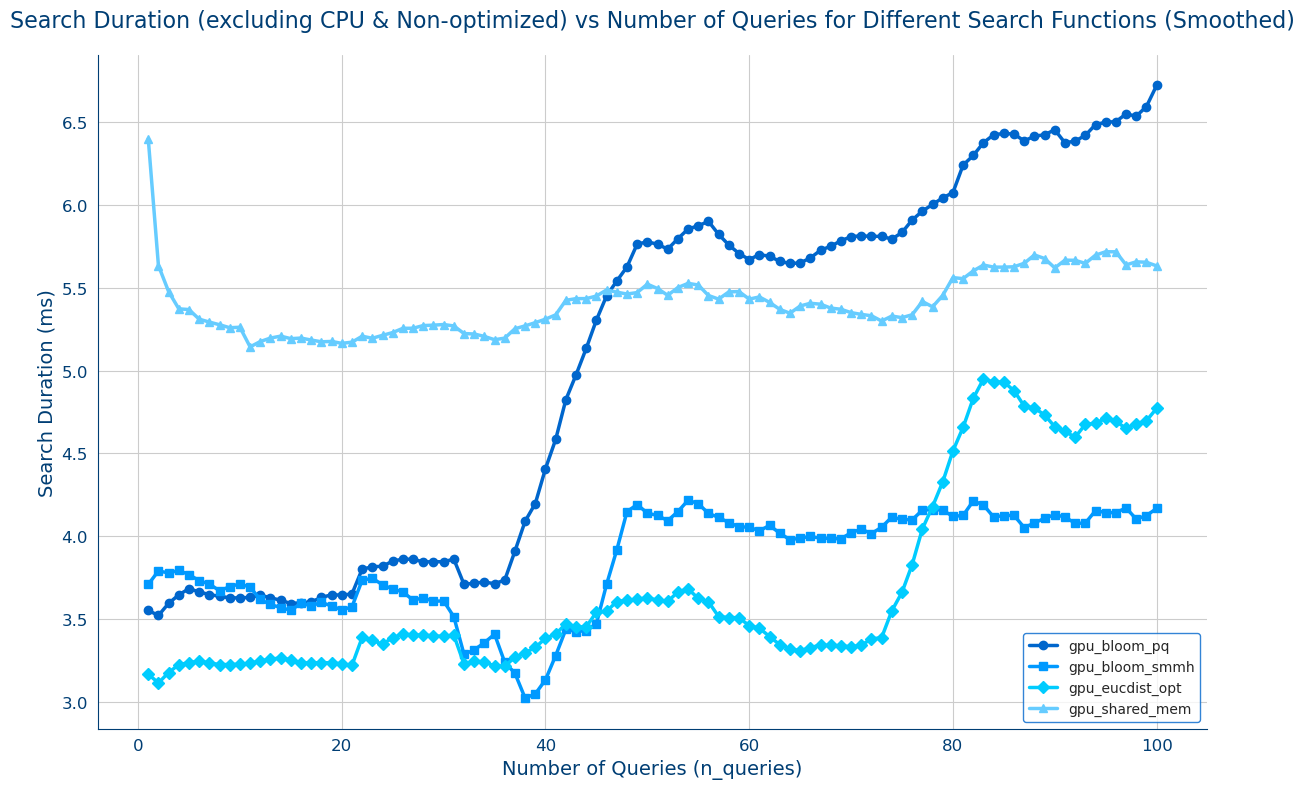

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)

# Exclude the "cpu" search function (case-insensitive)
df = df[df["search_function"].str.lower() != "cpu"]
df = df[df["search_function"].str.lower() != "gpu_non_opt"]

# Define the window size for smoothing
window_size = 10  # Adjust based on your data's noise level

# Sort the DataFrame by 'search_function' and 'n_queries' to ensure correct rolling
df_sorted = df.sort_values(by=["search_function", "n_queries"])

# Apply rolling mean per search_function
df_sorted['search_duration_smooth'] = df_sorted.groupby('search_function')['search_duration'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Define Politecnico di Milano color palette
polimi_colors = {
    'background': '#FFFFFF',      # White
    'text': '#003E74',            # Dark Blue
    'accent1': '#0066CC',         # Medium Blue
    'accent2': '#0099FF',         # Light Blue
    'accent3': '#00CCFF',         # Cyan
    'accent4': '#66CCFF',         # Sky Blue
    'accent5': '#3399FF'          # Royal Blue
}

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a color palette based on Polimi colors
palette = [
    polimi_colors['accent1'], 
    polimi_colors['accent2'], 
    polimi_colors['accent3'],
    polimi_colors['accent4'], 
    polimi_colors['accent5']
]

# Define markers for different search functions
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Extend if needed

# Plot each search function with distinct colors and markers
for i, search_function in enumerate(df_sorted["search_function"].unique()):
    df_sf = df_sorted[df_sorted['search_function'] == search_function].sort_values(by="n_queries")
    plt.plot(
        df_sf["n_queries"], 
        df_sf["search_duration_smooth"]/1000,  # Use the smoothed data
        label=search_function,
        color=palette[i % len(palette)],
        marker=markers[i % len(markers)],
        linewidth=2.5,       # Slightly thicker lines for visibility
        markersize=6
    )

# Customize axes labels and title with LaTeX for microseconds
plt.xlabel("Number of Queries (n_queries)", fontsize=14, color=polimi_colors['text'])
plt.ylabel(r"Search Duration (ms)", fontsize=14, color=polimi_colors['text'])
plt.title("Search Duration (excluding CPU & Non-optimized) vs Number of Queries for Different Search Functions (Smoothed)", 
          fontsize=16, color=polimi_colors['text'], pad=20)

# Customize tick parameters
plt.xticks(fontsize=12, color=polimi_colors['text'])
plt.yticks(fontsize=12, color=polimi_colors['text'])

# Customize legend
plt.legend(title='Search Function', fontsize=12, title_fontsize=14, loc='best')
plt.legend().get_frame().set_edgecolor(polimi_colors['accent1'])

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(polimi_colors['text'])
ax.spines['bottom'].set_color(polimi_colors['text'])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with high resolution
plt.savefig("figures/search_duration_plot_excluding_nonoptimized_cpu_smoothed_n_queries.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


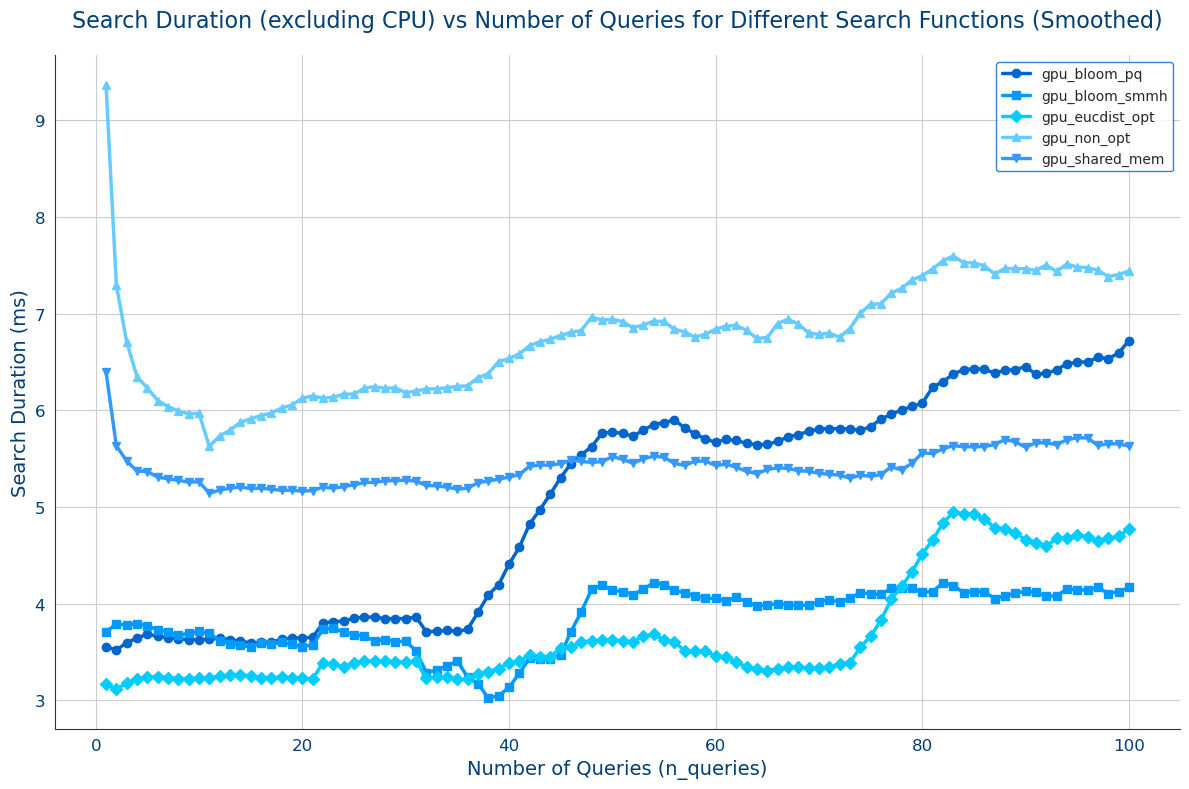

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)

# Exclude the "cpu" search function (case-insensitive)
df = df[df["search_function"].str.lower() != "cpu"]
#df = df[df["search_function"].str.lower() != "gpu_non_opt"]

# Define the window size for smoothing
window_size = 10  # Adjust based on your data's noise level

# Sort the DataFrame by 'search_function' and 'n_queries' to ensure correct rolling
df_sorted = df.sort_values(by=["search_function", "n_queries"])

# Apply rolling mean per search_function
df_sorted['search_duration_smooth'] = df_sorted.groupby('search_function')['search_duration'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Define Politecnico di Milano color palette
polimi_colors = {
    'background': '#FFFFFF',      # White
    'text': '#003E74',            # Dark Blue
    'accent1': '#0066CC',         # Medium Blue
    'accent2': '#0099FF',         # Light Blue
    'accent3': '#00CCFF',         # Cyan
    'accent4': '#66CCFF',         # Sky Blue
    'accent5': '#3399FF'          # Royal Blue
}

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a color palette based on Polimi colors
palette = [
    polimi_colors['accent1'], 
    polimi_colors['accent2'], 
    polimi_colors['accent3'],
    polimi_colors['accent4'], 
    polimi_colors['accent5']
]

# Define markers for different search functions
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Extend if needed

# Plot each search function with distinct colors and markers
for i, search_function in enumerate(df_sorted["search_function"].unique()):
    df_sf = df_sorted[df_sorted['search_function'] == search_function].sort_values(by="n_queries")
    plt.plot(
        df_sf["n_queries"], 
        df_sf["search_duration_smooth"]/1000,  # Use the smoothed data
        label=search_function,
        color=palette[i % len(palette)],
        marker=markers[i % len(markers)],
        linewidth=2.5,       # Slightly thicker lines for visibility
        markersize=6
    )

# Customize axes labels and title with LaTeX for microseconds
plt.xlabel("Number of Queries (n_queries)", fontsize=14, color=polimi_colors['text'])
plt.ylabel(r"Search Duration (ms)", fontsize=14, color=polimi_colors['text'])
plt.title("Search Duration (excluding CPU) vs Number of Queries for Different Search Functions (Smoothed)", 
          fontsize=16, color=polimi_colors['text'], pad=20)

# Customize tick parameters
plt.xticks(fontsize=12, color=polimi_colors['text'])
plt.yticks(fontsize=12, color=polimi_colors['text'])

# Customize legend
plt.legend(title='Search Function', fontsize=12, title_fontsize=14, loc='best')
plt.legend().get_frame().set_edgecolor(polimi_colors['accent1'])

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(polimi_colors['text'])
ax.spines['bottom'].set_color(polimi_colors['text'])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with high resolution
plt.savefig("figures/search_duration_plot_excluding_cpu_smoothed_n_queries.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


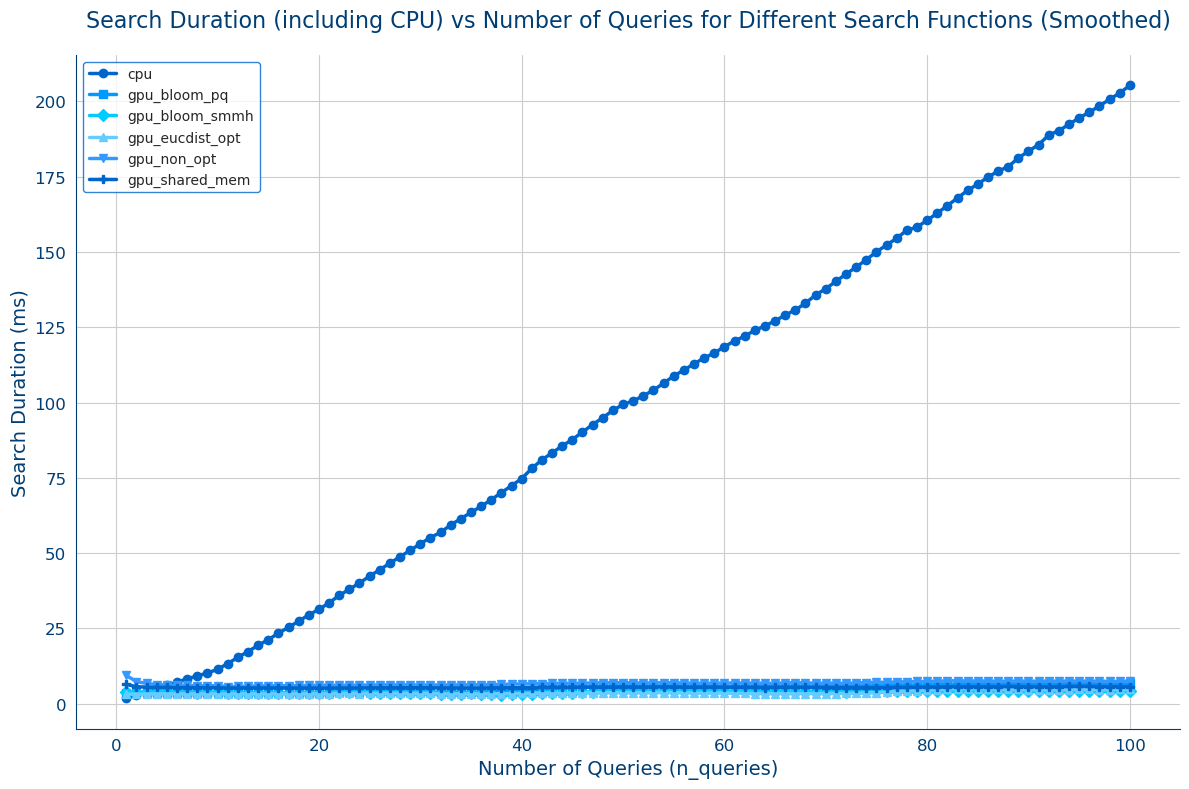

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv("results/search_times.csv")
df["search_function"] = df["save_name"].apply(lambda x: x.split("-")[0])
df["k"] = df["save_name"].apply(lambda x: int(x.split("-")[1][1:]))
df["n_queries"] = df["save_name"].apply(lambda x: int(x.split("-")[2][5:]))
df.drop(columns=["save_name"], inplace=True)

# Exclude the "cpu" search function (case-insensitive)
#df = df[df["search_function"].str.lower() != "cpu"]
#df = df[df["search_function"].str.lower() != "gpu_non_opt"]

# Define the window size for smoothing
window_size = 10  # Adjust based on your data's noise level

# Sort the DataFrame by 'search_function' and 'n_queries' to ensure correct rolling
df_sorted = df.sort_values(by=["search_function", "n_queries"])

# Apply rolling mean per search_function
df_sorted['search_duration_smooth'] = df_sorted.groupby('search_function')['search_duration'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Define Politecnico di Milano color palette
polimi_colors = {
    'background': '#FFFFFF',      # White
    'text': '#003E74',            # Dark Blue
    'accent1': '#0066CC',         # Medium Blue
    'accent2': '#0099FF',         # Light Blue
    'accent3': '#00CCFF',         # Cyan
    'accent4': '#66CCFF',         # Sky Blue
    'accent5': '#3399FF'          # Royal Blue
}

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a color palette based on Polimi colors
palette = [
    polimi_colors['accent1'], 
    polimi_colors['accent2'], 
    polimi_colors['accent3'],
    polimi_colors['accent4'], 
    polimi_colors['accent5']
]

# Define markers for different search functions
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Extend if needed

# Plot each search function with distinct colors and markers
for i, search_function in enumerate(df_sorted["search_function"].unique()):
    df_sf = df_sorted[df_sorted['search_function'] == search_function].sort_values(by="n_queries")
    plt.plot(
        df_sf["n_queries"], 
        df_sf["search_duration_smooth"]/1000,  # Use the smoothed data
        label=search_function,
        color=palette[i % len(palette)],
        marker=markers[i % len(markers)],
        linewidth=2.5,       # Slightly thicker lines for visibility
        markersize=6
    )

# Customize axes labels and title with LaTeX for microseconds
plt.xlabel("Number of Queries (n_queries)", fontsize=14, color=polimi_colors['text'])
plt.ylabel(r"Search Duration (ms)", fontsize=14, color=polimi_colors['text'])
plt.title("Search Duration (including CPU) vs Number of Queries for Different Search Functions (Smoothed)", 
          fontsize=16, color=polimi_colors['text'], pad=20)

# Customize tick parameters
plt.xticks(fontsize=12, color=polimi_colors['text'])
plt.yticks(fontsize=12, color=polimi_colors['text'])

# Customize legend
plt.legend(title='Search Function', fontsize=12, title_fontsize=14, loc='best')
plt.legend().get_frame().set_edgecolor(polimi_colors['accent1'])

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(polimi_colors['text'])
ax.spines['bottom'].set_color(polimi_colors['text'])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with high resolution
plt.savefig("figures/search_duration_plot_including_cpu_smoothed_n_queries.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()